In [9]:
import sympy as sym
import numpy as np
sym.init_printing()
from IPython.display import display,Math
from sympy.abc import x,y
import math
from math import gcd
x,y = sym.symbols('x,y')
import matplotlib.pyplot as plt
import sympy.plotting.plot as symplot
x,a = sym.symbols('x,a')
from matplotlib.patches import Polygon
from matplotlib import pyplot as plt
import cmath as cm
import scipy as sp
from scipy.signal import find_peaks
import seaborn as sns
from plotly.subplots import make_subplots
from plotly import graph_objects as go


#evaluate a function in a range

fx = (4 * x**3 + 2 * x **2 - x) / (-4 * x **4 + 2 * x **2)

xrange = np.linspace(-2,2,200)

fxx = sym.lambdify(x,fx)

plt.plot(xrange,fxx)

plt.ylim([-20,20])

plt.xlim(xrange[[0,-1]])

plt.show()

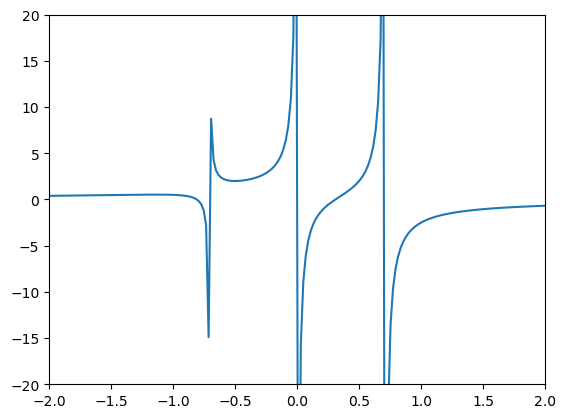

In [3]:
fx = (4 * x**3 + 2 * x **2 - x) / (-4 * x **4 + 2 * x **2)

xrange = np.linspace(-2,2,200)
fxx = sym.lambdify(x,fx)

plt.plot(xrange,fxx(xrange))
plt.ylim([-20,20])
plt.xlim(xrange[[0,-1]])
plt.show()

#compute the limit 

x = sym.symbols('x')

fx = 1/(x+3)

lim_pnt = -3

lim = sym.limit(x,fx,lim_pnt,dir ='+')

display(Math('\ \ lim_{x\ \to %g^+}%s=%g' %(lim_pnt,sym.latex(fx),lim)))

<IPython.core.display.Math object>

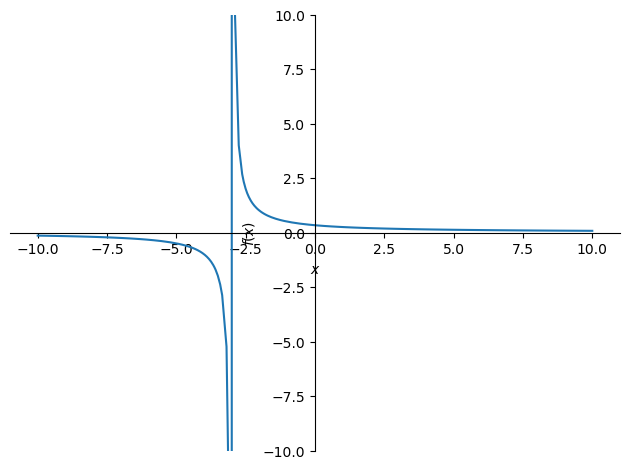

In [4]:
x = sym.symbols('x')
fx = 1/(x+3)

lim_pnt = -3
lim = sym.limit(fx,x,lim_pnt,dir='+')

display(Math('\\lim_{x\\to %g^+} %s = %s'%(lim_pnt,sym.latex(fx),sym.latex(lim))))

p = sym.plotting.plot(fx,show=False)
p.ylim = [-10,10]
p.show()

#piece-wise function 

piece1 = x**2

piece2 = 4*sym.exp(-x**2)

#put them together with conditions

fx = sym.Piecewise( piece1,x<0, [piece2,x>=0))

#evaluate the function in a range

xx = np.linspace(-2,2,1000)

fxx = sym.lambdify(x,fx)

#show it in a plot

plt.plot(xx,fxx(x),'k')

plt.show()

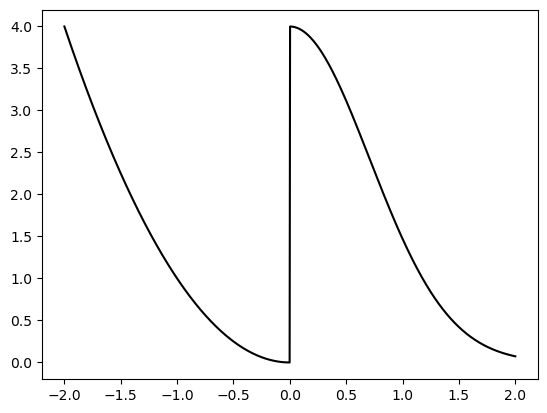

In [5]:
piece1 = x**2
piece2 = 4*sym.exp(-x**2)

fx = sym.Piecewise((piece1,x<0),(piece2,x>=0))

xx = np.linspace(-2,2,1000)
fxx = sym.lambdify(x,fx)

plt.plot(xx,fxx(xx),'k')

plt.show()

#show the first and second derivatives of sin(x)

x = np.linspace(-2*np.pi,2*np.pi,200)

dt = np.diff(x[0:2])

y = np.sin(x)

dy = np.diff(y)

ddy = np.diff(y,2)

plt.plot(x,y,label = 'y')

plt.plot(x,dy,'--',label='dy',alpha=.6)

plt.plot(x,ddy,':',label='d$^2$y',apha=.3)

plt.legend(framealpha=1)

plt.show()

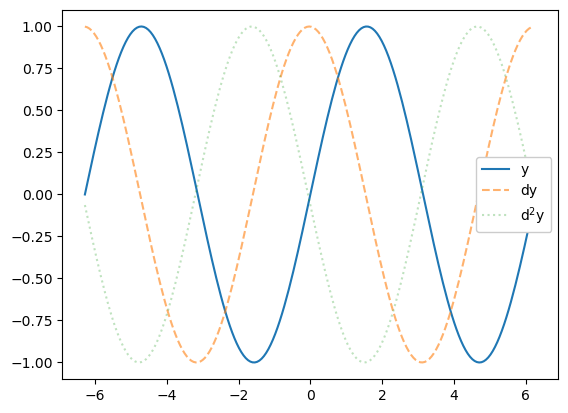

In [6]:
x = np.linspace(-2*np.pi,2*np.pi,200)
dt = np.diff(x[0:2])

y = np.sin(x)
dy = np.diff(y)/dt
ddy = np.diff(y,2)/dt**2

plt.plot(x,y,label='y')
plt.plot(x[0:-1],dy,'--',label='dy',alpha=.6)
plt.plot(x[0:-2],ddy,':',label='d$^2$y',alpha=.3)

plt.legend(framealpha=1)
plt.show()

#compute critical points using sympy

x = sym.symbols('x')

fx = x ** 2 * sym.exp(-x**2)

#derivatives in sympy,solve

dfx = sym.diff(fx,x)

critipoints = sym.solve(fx)

print('The critical points are: ' + str(critpoints))

#plot the function derivative and its critical points

y = sym.lambdify(x,dfx)

xx = np.linspace(-3,3,200)

plt.plot(xx,y(xx))

plt.plot([-3,3],[0,0],'k--')

plt.xlim([-3,3])

for i in critpoints:

    plt.plot(i,0,'ro')

plt.title('Function derivative')

plt.show()

The critical points are: [-1, 0, 1]


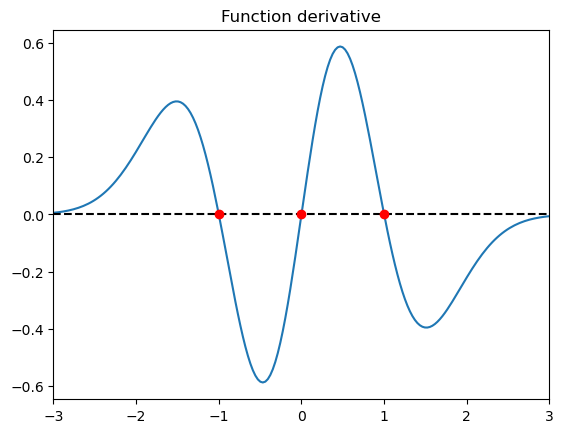

In [7]:
x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)

dfx = sym.diff(fx,x)
critipoints = sym.solve(dfx)
print('The critical points are: ' + str(critipoints))

y = sym.lambdify(x,dfx)
xx = np.linspace(-3,3,200)

plt.plot(xx,y(xx))
plt.plot([-3,3],[0,0],'k--')
plt.xlim([-3,3])

for i in critipoints:
    plt.plot(i,0,'ro')

plt.title('Function derivative')
plt.show()

#compute the area between two curves(not the same thing as between two frens)

x = sym.symbols('x')

f1sym = sym.cos(x)

f2sym = x

xx = np.linspace(0,np.pi/3,100)

f1 = np.cos(xx)

f2 = xx

finstersect = np.argmin(abs(f1-f2))

traceX = np.concatenate((xx[0:fintersect],xx[fintersect:0:-1]))

traceX = np.concatenate((f1[0:fintersect],f2[fintersect:0:-1]))

points = np.vstack((teaceX,traceY))

p = Polygon(points,facecolor='k',aplha=.3)

fig, ax = plt.subplots()

ax.add_patch(p)

plt.plot(xx,f1, xx,f2)

plt.show()


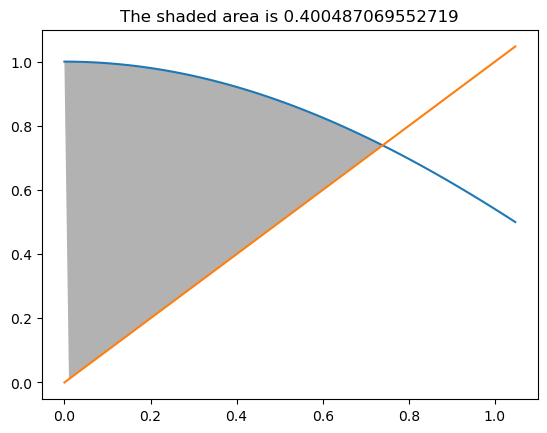

In [13]:
x = sym.symbols('x')
f1sym = sym.cos(x)
f2sym = x

xx = np.linspace(0,np.pi/3,100)
f1 = np.cos(xx)
f2 = xx

fintersect = np.argmin(abs(f1-f2))

A = sym.integrate(f1sym-f2sym,(x,xx[0],xx[fintersect]))

traceX = np.concatenate((xx[0:fintersect],xx[fintersect:0:-1]))
traceY = np.concatenate((f1[0:fintersect],f2[fintersect:0:-1]))

points = np.vstack((traceX,traceY)).T
p = Polygon(points,facecolor='k',alpha=.3)

fig,ax = plt.subplots()
ax.add_patch(p)

plt.plot(xx,f1,xx,f2)
plt.title('The shaded area is %s' %A)
plt.show()